In [36]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# path = 'dataset_v0/81Mr2H57TWL._AC_SX679_.jpg'
path = 'dataset_v0/81fQJtHh72L._AC_SX679_.jpg'
assert(os.path.exists(path))
img = cv2.imread(path)

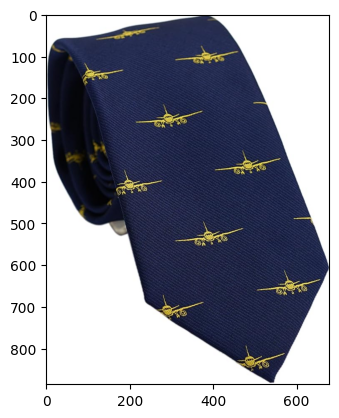

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

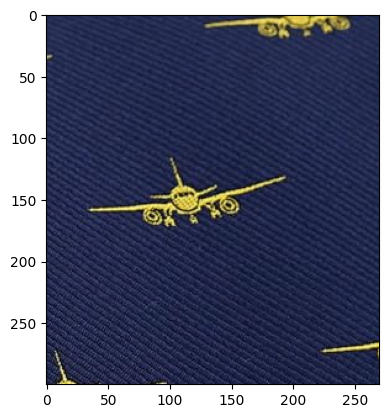

In [110]:
red_img = img[100:400, 180:450, :]
plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))

[[[ 28 110 242]]]


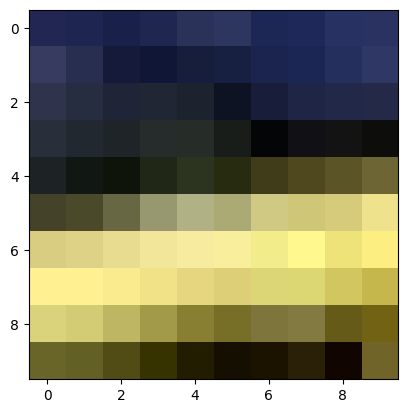

In [111]:
red_red_img = img[250:260, 250:260, :]
print(cv2.cvtColor(red_red_img, cv2.COLOR_BGR2HSV)[6:7, 6:7, :])
plt.imshow(cv2.cvtColor(red_red_img, cv2.COLOR_BGR2RGB))

In [112]:
cv2.cvtColor(red_red_img, cv2.COLOR_BGR2HSV)[0:1, 0:1, :]

array([[[118, 151,  83]]], dtype=uint8)

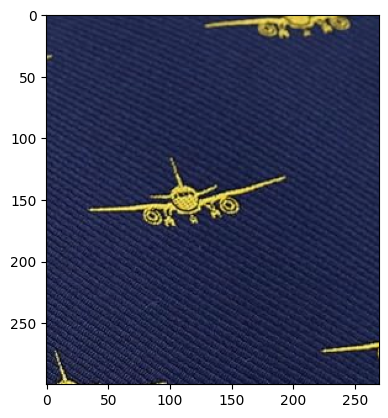

In [113]:
img_hsv = cv2.cvtColor(red_img, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))

In [135]:
hist = cv2.calcHist(images=[img_hsv], channels=[0, 1, 2], mask=None, histSize=[180, 256, 256], ranges=[0, 180, 0, 256, 0, 256])
hist.shape

(180, 256, 256)

In [136]:
img_hsv.shape

(300, 270, 3)

In [158]:
points = img_hsv.reshape(-1, 3)
# import kmeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(points)
model.cluster_centers_

array([[114.35003206, 143.48223676,  76.22046941],
       [ 26.56534653, 117.15478548, 170.82607261]])

In [159]:
model.cluster_centers_[0]

array([114.35003206, 143.48223676,  76.22046941])

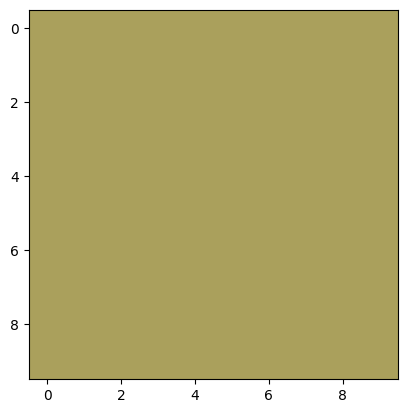

In [162]:
i = 1
hsv = [int(x) for x in model.cluster_centers_[i]]
square = np.full((10, 10, 3), hsv, dtype=np.uint8)
plt.imshow(cv2.cvtColor(square, cv2.COLOR_HSV2RGB))

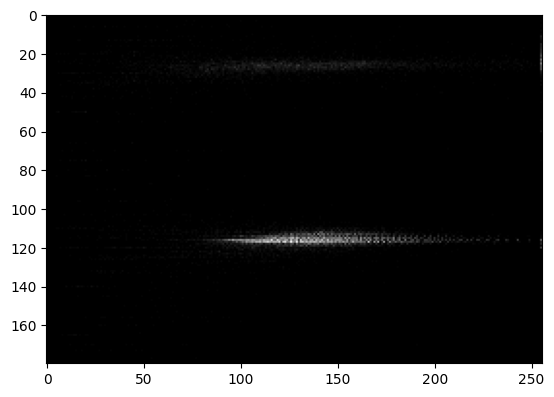

In [134]:
m = hist > 10
hist[m] = 0.1
hist2d = hist.mean(axis=2)
plt.imshow(hist2d, cmap='gray')

10.0


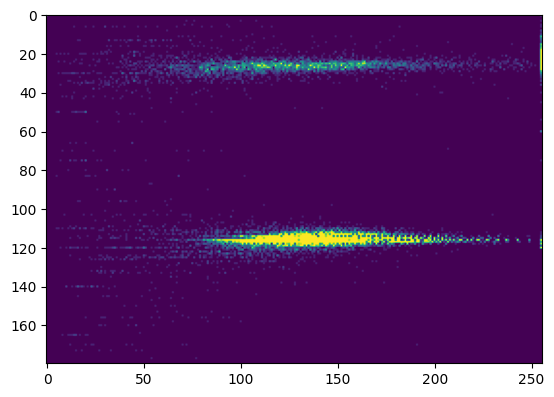

In [126]:
# get 2D histogram of hue and saturation
# images: list of images as numpy arrays. All images must be of the same dtype and same size.
# channels: list of the channels used to calculate the histograms.
# mask: optional mask (8 bit array) of the same size as the input image.
# histSize: histogram sizes in each dimension
# ranges: Array of the dims arrays of the histogram bin boundaries in each dimension
# hist: Output histogram
# accumulate: accumulation flag, enables to compute a single histogram from several sets of arrays.
hist = cv2.calcHist(images=[img_hsv], channels=[0, 1], mask=None, histSize=[180, 256], ranges=[0, 180, 0, 256])
# hist = np.linalg.norm(hist)
m = hist > 10
hist[m] = 10
plt.imshow(hist)
print(hist.max())

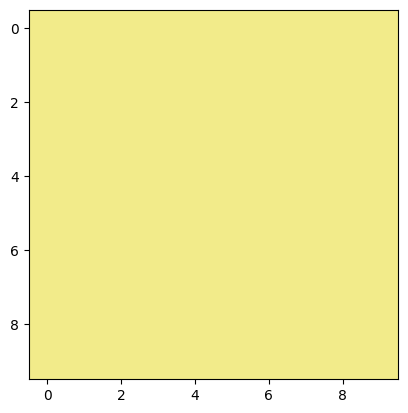

In [71]:
# hsv = 0, 150, 150
hsv = 28, 110, 242
square = np.full((10, 10, 3), hsv, dtype=np.uint8)
# square = np.full((10, 10, 3), hsv, dtype=np.uint8) / 255.0
# print(square.shape)
plt.imshow(cv2.cvtColor(square, cv2.COLOR_HSV2RGB))

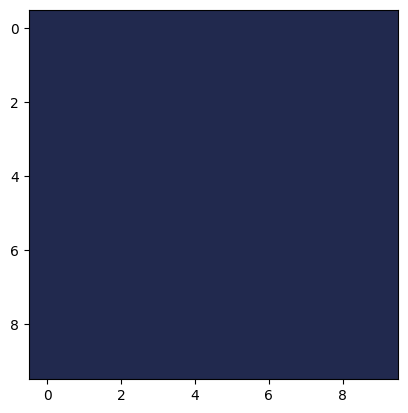

In [68]:
hsv = 115, 147, 78
square = np.full((10, 10, 3), hsv, dtype=np.uint8)
plt.imshow(cv2.cvtColor(square, cv2.COLOR_HSV2RGB))

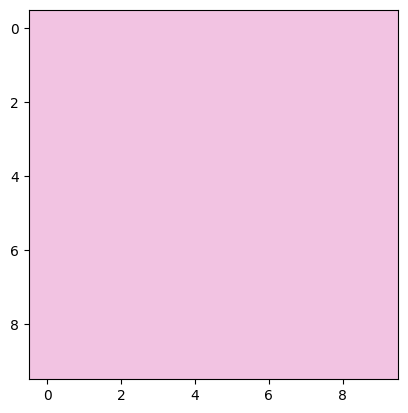

In [92]:
hsv = 160, 50, 242
square = np.full((10, 10, 3), hsv, dtype=np.uint8)
plt.imshow(cv2.cvtColor(square, cv2.COLOR_HSV2RGB))

In [93]:
hue = 30
square = np.zeros((255, 255, 3), dtype=np.uint8)
for sat in range(0, 255):
    for val in range(0, 255):
        square[sat, val, :] = [hue, sat, val]

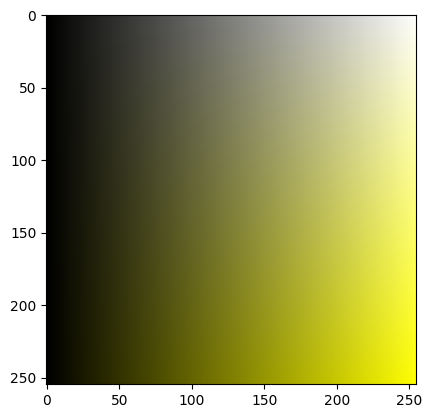

In [94]:
plt.imshow(cv2.cvtColor(square, cv2.COLOR_HSV2RGB))